Задача включает в себя несколько шагов:

1. Создать датасеты с "качественными данными". Это могут быть простые датасеты с некоторыми линейными отношениями между признаками и целевой переменной.
2. Обучить модель линейной регрессии на одном из этих датасетов.
3. Создать датасет с шумом в данных. Это может быть один из исходных датасетов, но с добавлением случайного шума к признакам или целевой переменной. Например:

<center><img src="clean_data.png" width="300"></center>

4. Использовать Pytest для тестирования работы вашей модели на разных датасетах. Для оценки качества предсказаний воспользуемся среднеквадратичной ошибкой (MSE).
Например:

<center><img src="noised_data.png" width="300"></center>

5. Выявить проблему на датасете с шумами. Возможно, качество предсказания модели значительно ухудшается на этом датасете.


In [74]:
# Импортируем необходимые библиотеки
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pytest

In [75]:
# Определим константы
NUM_SAMPLES = 100  # Количество сэмплов в датасете
NOISE_LEVEL = 1.5  # Уровень шума

In [76]:
# Напишем функции работы с данными
def generate_dataset(num_samples, noise_level=0):
    """Генерирует датасет с заданным количеством примеров и уровнем шума."""
    np.random.seed(42)
    X = np.random.rand(num_samples, 2)
    noise = noise_level * np.random.randn(num_samples)
    y = 3 * X[:, 0] + 2 * X[:, 1] + noise
    df = pd.DataFrame({'Feature_1': X[:, 0], 'Feature_2': X[:, 1], 'Target': y})
    return df

def train_model(df):
    """Обучает модель линейной регрессии на заданном датасете."""
    X = df.drop('Target', axis=1)
    y = df['Target']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model, X_test, y_test

In [85]:
# Генерация датасетов
df = generate_dataset(NUM_SAMPLES)
df1 = generate_dataset(num_samples=200)
df2 = generate_dataset(num_samples=300)
df_noisy_features = generate_dataset(NUM_SAMPLES, NOISE_LEVEL)

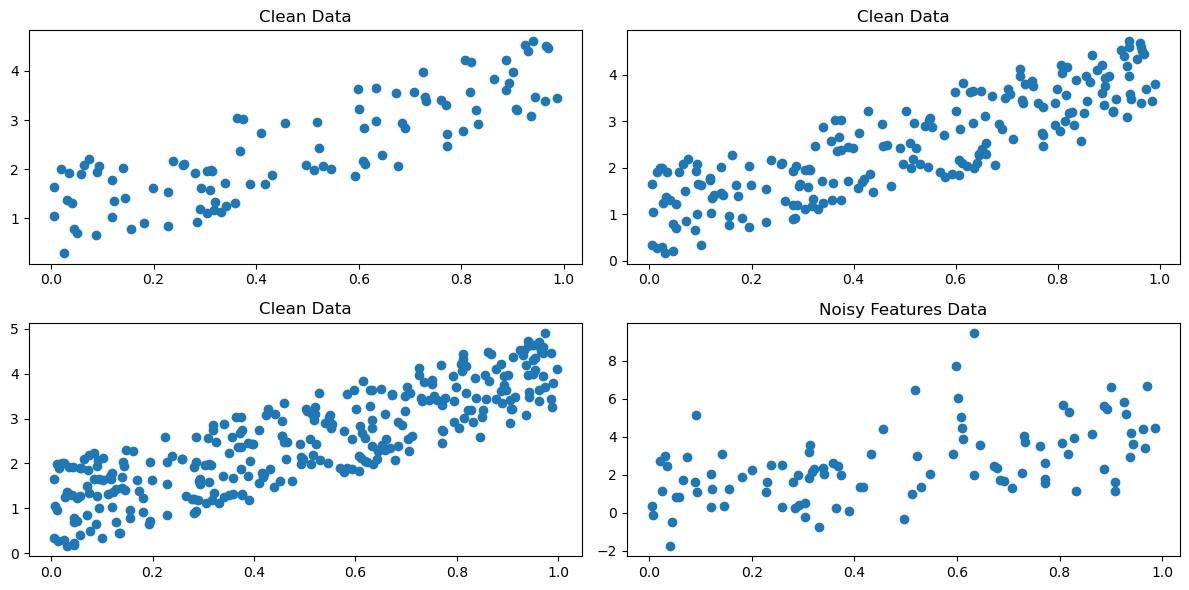

In [86]:
# Построим scatter plot для каждого датасета
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(12, 6))
axs[0, 0].scatter(df['Feature_1'], df['Target'])
axs[0, 0].set_title('Clean Data')
axs[0, 1].scatter(df1['Feature_1'], df1['Target'])
axs[0, 1].set_title('Clean Data')
axs[1, 0].scatter(df2['Feature_1'], df2['Target'])
axs[1, 0].set_title('Clean Data')
axs[1, 1].scatter(df_noisy_features['Feature_1'], df_noisy_features['Target'])
axs[1, 1].set_title('Noisy Features Data')
plt.tight_layout()
plt.show()



In [87]:
# Обучение модели
model, X_test, y_test = train_model(df)

In [88]:
import ipytest

# Тестирование модели
def test_model_on_noisy_features():
    _, X_test_noisy_features, y_test_noisy_features = train_model(df_noisy_features)
    predictions = model.predict(X_test_noisy_features)
    mse = mean_squared_error(y_test_noisy_features, predictions)
    print("MSE on Noisy Features Data:", mse)
    assert mse > 5 # Проверяем, что MSE больше 5


def test_model_on_clean_data():
        predictions = model.predict(X_test)
        mse = mean_squared_error(y_test, predictions)
        print("MSE on Clean Data:", mse)
        assert mse < 1 # Проверяем, что MSE меньше 1

ipytest.run('-v')

======================================= test session starts =======================================
platform win32 -- Python 3.9.19, pytest-7.4.0, pluggy-1.0.0
rootdir: C:\Apps\Shared\UrFU\S02\mlops_practice\lab5
plugins: anyio-4.2.0
collected 2 items

t_aa7a838d7b4d4856abc05bc8ba01053f.py F.                                                     [100%]

============================================ FAILURES =============================================
__________________________________ test_model_on_noisy_features ___________________________________

    def test_model_on_noisy_features():
        _, X_test_noisy_features, y_test_noisy_features = train_model(df_noisy_features)
        predictions = model.predict(X_test_noisy_features)
        mse = mean_squared_error(y_test_noisy_features, predictions)
        print("MSE on Noisy Features Data:", mse)
>       assert mse > 5 # Проверяем, что MSE больше 5
E       assert 1.651292721535103 > 5

C:\Users\Sega\AppData\Local\Temp\ipykernel_2240

<ExitCode.TESTS_FAILED: 1>

# Выводы
В данной лабораторной работе мы создали датасет с "качественными данными" и обучили модель линейной регрессии на одном из них. Затем мы создали датасет с шумом в данных и использовали Pytest для тестирования работы модели на разных датасетах. Мы выявили проблему на датасете с шумами: качество предсказания модели значительно ухудшилось.